<a href="https://colab.research.google.com/github/swethanjali24/random_forest_assignment/blob/main/CreditRiskAssessment_RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# Importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,r2_score,recall_score


In [97]:
# Importing the data
customer_df=pd.read_csv('/content/drive/MyDrive/assignments-BE/RandomForest/customer_data.csv')
payment_df=pd.read_csv('/content/drive/MyDrive/assignments-BE/RandomForest/payment_data.csv')


In [98]:
'''
payment_data.csv:

payment_data.csv: customer’s card payment history.
id: customer id
OVD_t1: number of times overdue type 1
OVD_t2: number of times overdue type 2
OVD_t3: number of times overdue type 3
OVD_sum: total overdue days
pay_normal: number of times normal payment
prod_code: credit product code
prod_limit: credit limit of product
update_date: account update date
new_balance: current balance of product
highest_balance: highest balance in history
report_date: date of recent payment

customer_data.csv:

customer’s demographic data and category attributes which have been encoded.
Category features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.
label is 1, the customer is in high credit risk
label is 0, the customer is in low credit risk

'''

'\npayment_data.csv:\n\npayment_data.csv: customer’s card payment history.\nid: customer id\nOVD_t1: number of times overdue type 1\nOVD_t2: number of times overdue type 2\nOVD_t3: number of times overdue type 3\nOVD_sum: total overdue days\npay_normal: number of times normal payment\nprod_code: credit product code\nprod_limit: credit limit of product\nupdate_date: account update date\nnew_balance: current balance of product\nhighest_balance: highest balance in history\nreport_date: date of recent payment\n\ncustomer_data.csv:\n\ncustomer’s demographic data and category attributes which have been encoded.\nCategory features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.\nlabel is 1, the customer is in high credit risk\nlabel is 0, the customer is in low credit risk\n\n'

In [99]:
'''
This dataset has two csv files from kaggle, one for customer information and the other for payment transactions history,
here we need to merge these two dataframes inorder to proceed with model building on the basis of unique id, which here is
the column named id
'''


'\nThis dataset has two csv files from kaggle, one for customer information and the other for payment transactions history,\nhere we need to merge these two dataframes inorder to proceed with model building on the basis of unique id, which here is\nthe column named id\n'

In [100]:
# Merging the two dataframes
df=pd.merge(customer_df,payment_df,on='id')
df.head()# merged data
df.shape# 8250R*24C
df['label'].value_counts()# imbalanced data
df.isnull().sum().any()# null values present
df.isnull().sum()

'''
fea_2,prod_limit,update_date,highest_balance,report_date have missing values,so we temporarily impute them all with mean value of the corresponding
feature
'''

'\nfea_2,prod_limit,update_date,highest_balance,report_date have missing values,so we temporarily impute them all with mean value of the corresponding\nfeature\n'

In [101]:
df.duplicated().sum()# there are duplicate values,so we remove all the duplicates by keeping first instance
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()


np.int64(0)

In [102]:
# fill the missing values
df['fea_2']=df['fea_2'].fillna(df['fea_2'].mean())
df['prod_limit']=df['prod_limit'].fillna(df['prod_limit'].mean())
df['highest_balance']=df['highest_balance'].fillna(df['highest_balance'].mean())

df.isnull().sum()


,0
label,0
id,0
fea_1,0
fea_2,0
fea_3,0
fea_4,0
fea_5,0
fea_6,0
fea_7,0
fea_8,0


In [103]:
# ensuring dates are in proper format
df['update_date']=pd.to_datetime(df['update_date'])
df['report_date']=pd.to_datetime(df['report_date'])
# fill the missing values for dates
df['report_date']=df['report_date'].fillna(df['update_date'])
df.isnull().sum()







,0
label,0
id,0
fea_1,0
fea_2,0
fea_3,0
fea_4,0
fea_5,0
fea_6,0
fea_7,0
fea_8,0


In [104]:
# we shall remove the 21 rows where update date is missing
df.dropna(inplace=True)
df.isnull().sum()

,0
label,0
id,0
fea_1,0
fea_2,0
fea_3,0
fea_4,0
fea_5,0
fea_6,0
fea_7,0
fea_8,0


In [105]:
df.shape

(8138, 24)

In [106]:
# We will extract the data from date columns
df['days_since_update'] = (df['report_date'] - df['update_date']).dt.days
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,days_since_update
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,9,10,60500.000000,2015-01-31,6657.6,18934.0,2015-09-19,231
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,18,10,85790.677253,2009-04-28,153792.0,149387.0,2015-08-10,2295
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,1,5,85790.677253,2009-03-30,0.0,150500.0,2009-03-30,0
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,26,11906,6,10,85790.677253,2007-05-17,0.0,46371.0,2013-07-12,2248
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,4,6,85790.677253,2016-06-02,15120.0,21500.0,2016-04-19,-44


In [107]:
df.drop(['update_date','report_date'],axis=1,inplace=True)
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,days_since_update
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,9,10,60500.000000,6657.6,18934.0,231
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,18,10,85790.677253,153792.0,149387.0,2295
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,1,5,85790.677253,0.0,150500.0,0
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,2,26,11906,6,10,85790.677253,0.0,46371.0,2248
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,4,6,85790.677253,15120.0,21500.0,-44


In [108]:
# Separating input and output
X=df.drop('label',axis=1)
y=df['label']


In [109]:
# scaling the input
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X.head()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,days_since_update
0,0.000078,0.666667,0.353909,1.0,0.052321,1.0,0.923077,0.545455,0.882353,1.0,...,0.0,0.000000,0.000000,0.000000,0.250000,0.370370,0.091665,0.000288,0.000102,0.089650
1,0.000078,0.666667,0.353909,1.0,0.052321,1.0,0.923077,0.545455,0.882353,1.0,...,0.0,0.000000,0.000000,0.000000,0.500000,0.370370,0.129984,0.001189,0.000827,0.349534
2,0.000078,0.666667,0.353909,1.0,0.052321,1.0,0.923077,0.545455,0.882353,1.0,...,0.0,0.000000,0.000000,0.000000,0.027778,0.185185,0.129984,0.000247,0.000833,0.060564
3,0.000078,0.666667,0.353909,1.0,0.052321,1.0,0.923077,0.545455,0.882353,1.0,...,0.0,0.058824,0.742857,0.377968,0.166667,0.370370,0.129984,0.000247,0.000255,0.343616
4,0.999637,0.500000,0.440329,0.0,0.082700,1.0,0.384615,0.000000,0.705882,0.5,...,0.0,0.000000,0.000000,0.000000,0.111111,0.222222,0.129984,0.000339,0.000117,0.055024


In [110]:
df.head()


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,days_since_update
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,9,10,60500.000000,6657.6,18934.0,231
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,18,10,85790.677253,153792.0,149387.0,2295
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,0,1,5,85790.677253,0.0,150500.0,0
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,2,26,11906,6,10,85790.677253,0.0,46371.0,2248
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,0,4,6,85790.677253,15120.0,21500.0,-44


In [111]:
# Performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [112]:
# Model intialization
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
# Predicting
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [114]:
# model evaluation
print('Train Accuracy',accuracy_score(y_train,y_pred_train))
print('train preciosn',precision_score(y_train,y_pred_train))
print('train recall',recall_score(y_train,y_pred_train))


print('Test Accuracy',accuracy_score(y_test,y_pred))
print('test precision',precision_score(y_test,y_pred))
print('test recall',recall_score(y_test,y_pred))


Train Accuracy 1.0
train preciosn 1.0
train recall 1.0
Test Accuracy 0.9508599508599509
test precision 0.9947089947089947
test recall 0.704119850187266


In [115]:
# can't rely on accuracy score as data is highly imbalanced.Recall score is very poor for test data


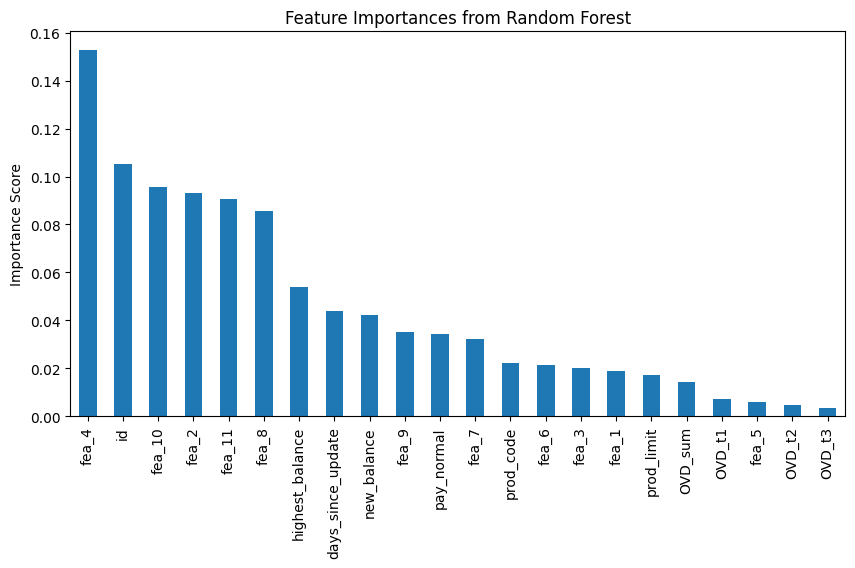

In [116]:
# lets check feature importance

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Sort and plot
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.show()

In [117]:
'''
Customer id, ovd_t1,ovd_t2,ovd_t3,fea_5 columns may be removed
'''

'\nCustomer id, ovd_t1,ovd_t2,ovd_t3,fea_5 columns may be removed\n'

In [118]:
X=X.drop(['id','OVD_t1','OVD_t2','OVD_t3','fea_5'],axis=1)
X.head()


,fea_1,fea_2,fea_3,fea_4,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,days_since_update
0,0.666667,0.353909,1.0,0.052321,0.923077,0.545455,0.882353,1.0,0.154727,0.345485,0.000000,0.250000,0.370370,0.091665,0.000288,0.000102,0.089650
1,0.666667,0.353909,1.0,0.052321,0.923077,0.545455,0.882353,1.0,0.154727,0.345485,0.000000,0.500000,0.370370,0.129984,0.001189,0.000827,0.349534
2,0.666667,0.353909,1.0,0.052321,0.923077,0.545455,0.882353,1.0,0.154727,0.345485,0.000000,0.027778,0.185185,0.129984,0.000247,0.000833,0.060564
3,0.666667,0.353909,1.0,0.052321,0.923077,0.545455,0.882353,1.0,0.154727,0.345485,0.377968,0.166667,0.370370,0.129984,0.000247,0.000255,0.343616
4,0.500000,0.440329,0.0,0.082700,0.384615,0.000000,0.705882,0.5,0.477501,0.291987,0.000000,0.111111,0.222222,0.129984,0.000339,0.000117,0.055024


In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)



In [120]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)


In [122]:
print('Train Accuracy',accuracy_score(y_train,y_pred_train))
print('train preciosn',precision_score(y_train,y_pred_train))
print('train recall',recall_score(y_train,y_pred_train))


print('Test Accuracy',accuracy_score(y_test,y_pred))
print('test precision',precision_score(y_test,y_pred))
print('test recall',recall_score(y_test,y_pred))

Train Accuracy 1.0
train preciosn 1.0
train recall 1.0
Test Accuracy 0.9355036855036855
test precision 0.9879518072289156
test recall 0.6142322097378277


In [123]:
# minimal improvement in recall score, so we go with gridSEarchCV


In [124]:
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [ 50, 10],
    'min_samples_split' : [ 4, 7, 2],
    'min_samples_leaf' : [ 3,4]
}


In [125]:
grid_search = GridSearchCV(estimator = model, param_grid = params,cv=5, scoring='recall',verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 10], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [4, 7, 2]},
             scoring='recall', verbose=1)

In [126]:
# Getting the best parameter combination
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [127]:
model=RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=10,min_samples_leaf=3,min_samples_split=7)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=200)

In [128]:
# Predicting
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [129]:
print('Train Accuracy',accuracy_score(y_train,y_pred_train))
print('train preciosn',precision_score(y_train,y_pred_train))
print('train recall',recall_score(y_train,y_pred_train))


print('Test Accuracy',accuracy_score(y_test,y_pred))
print('test precision',precision_score(y_test,y_pred))
print('test recall',recall_score(y_test,y_pred))

Train Accuracy 0.8907834101382488
train preciosn 0.9974683544303797
train recall 0.35688405797101447
Test Accuracy 0.8796068796068796
test precision 0.961038961038961
test recall 0.27715355805243447


In [129]:
# So our previous output with default parameters is better performing, and the recall can be improved if data is somewhat more balanced